## Iris Flower Classification


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import seaborn as sns
from pandas import DataFrame
%matplotlib inline

In [2]:
data = pd.read_csv('C:/Users/Hp/Downloads/iris.csv') #Getting my data from csv file
df=pd.DataFrame(data)

In [3]:
df.head()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [4]:
print(df.shape)

(150, 6)


<AxesSubplot:>

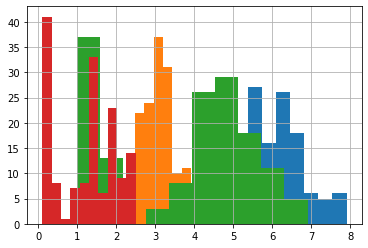

In [5]:
df['Sepal.Length'].hist()
df['Sepal.Width'].hist()
df['Petal.Length'].hist()
df['Petal.Width'].hist()

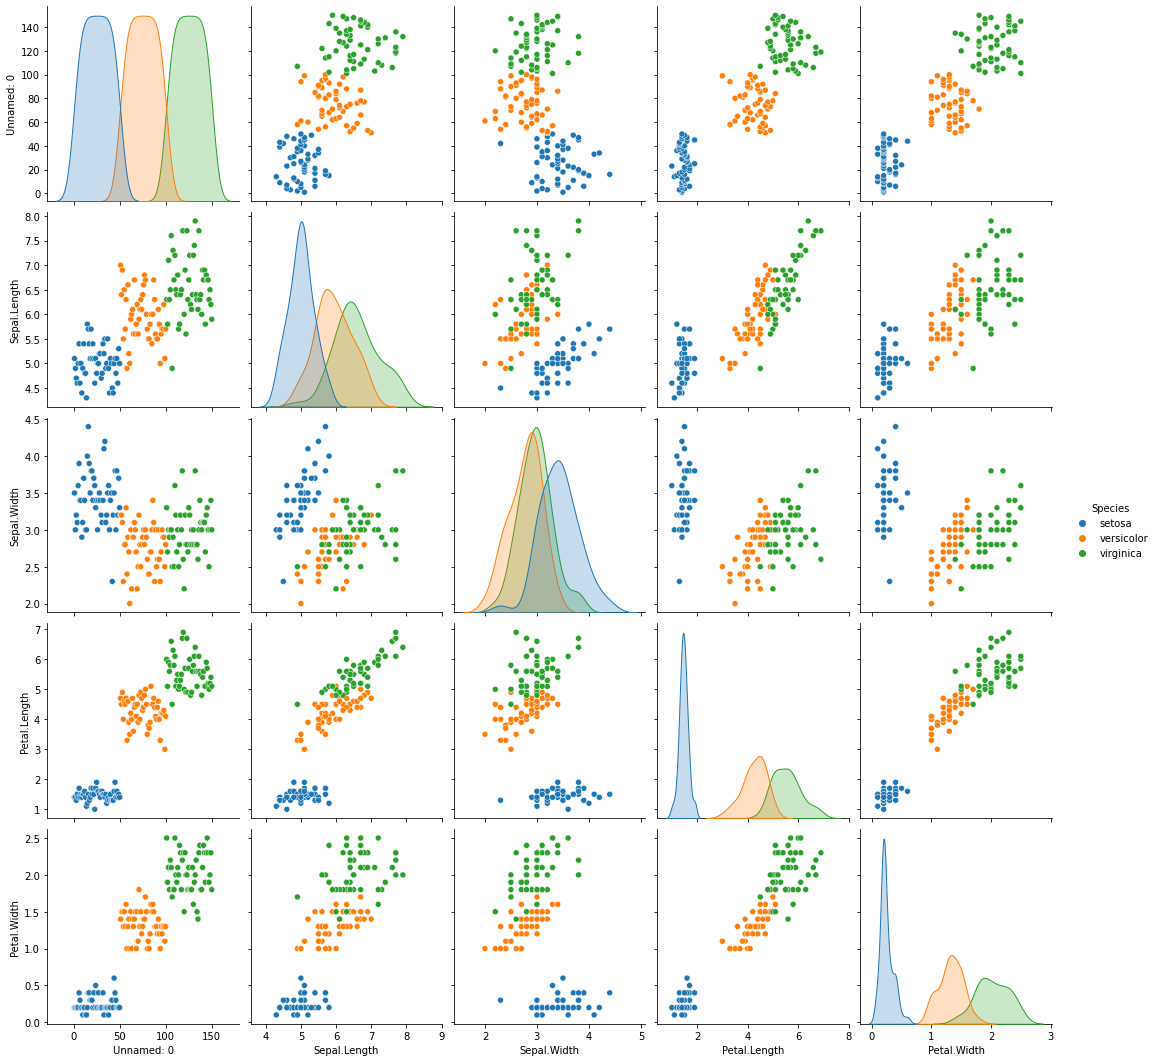

In [7]:
#using pairplot to plot to find parameters on the basis of which we will train our model
sns.pairplot(df, hue='Species', height=3)

In [8]:
#We Observe
#Sepal Length and Sepal Width are clustered in a haphazard fashion
#Petal Length and Petal Width are clustered in well defined groups
#So we will be classifying on the bases of Petal Length and Petal Width and drop all other parameters

## Making the heatmap of Values in dataset

<AxesSubplot:>

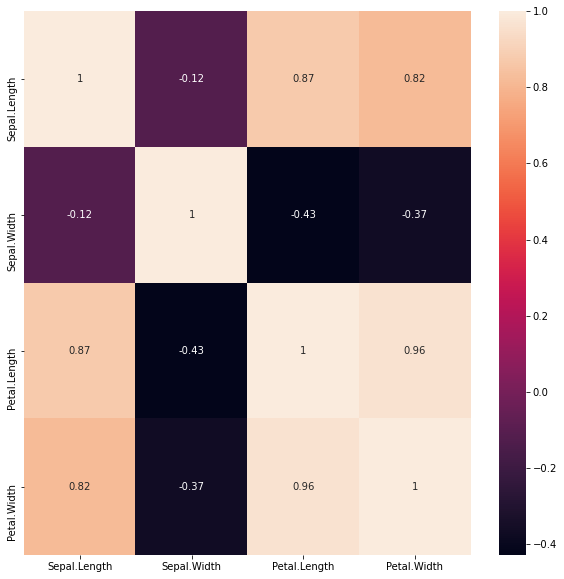

In [9]:
dfm=df.drop(columns=['Unnamed: 0'])
corr=dfm.corr()
fig,ax=plt.subplots(figsize=(10,10))
sns.heatmap(corr,annot=True,ax=ax)

<h1>Mapping the Species Column</h1>

In [10]:
map={'setosa':0 , 'versicolor':1, 'virginica':2}#Created a map for values
maparr=list(map.keys())#Created a map list

In [11]:
df.Species = df.Species.map(map)#Mapped the values to the dataframe

In [12]:
pd.set_option('display.max_rows',20)#Fetching all rows while printing ,(Set 20 to None to print all rows)

In [13]:
print(df.Species)#Print my edited species list

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64


In [14]:
x=df.iloc[:,1:5]#My x variable
y=df.iloc[:,5:6]#My y variable

In [15]:
x=x.to_numpy()#x column to numpy
y=y.values.ravel()#y column to array using ravel function

In [16]:
X_train, X_test, y_train, y_test = train_test_split(x,y, random_state=0)#test and train set split

# Model Implementation

> ## KNN 

In [17]:
knn = KNeighborsClassifier(n_neighbors=1)

In [18]:
knn.fit(X_train, y_train)#Using KNN classifier algorithm on the training set

KNeighborsClassifier(n_neighbors=1)

In [19]:
X_new = np.array([[6.1, 2.8, 4, 1.3]])
print("X_new.shape: {}".format(X_new.shape))

X_new.shape: (1, 4)


##### CUSTOM VALUE INPUT

In [20]:
prediction = knn.predict(X_new)
print("Prediction: {}".format(prediction))
print("Predicted flower: {}".format(maparr[prediction[0]]))#Predicted flower

Prediction: [1]
Predicted flower: versicolor


In [21]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n {}".format(y_pred))
print("Test set score (np.mean): {:.2f}".format(knn.score(X_test,y_test)*100))#Prediction accuracy score


Test set predictions:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]
Test set score (np.mean): 97.37


> ## LINEAR REGRESSION

In [22]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=1000)



In [23]:
model.fit(X_train ,y_train)#Fitting my model here through linear regression

LogisticRegression(max_iter=1000)

In [24]:
#get performance by printing metric
print("Accuracy: {:.2f}".format(model.score(X_test,y_test)*100))

Accuracy: 97.37


> ## RANDOM FOREST CLASSIFICATION

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
#init classifer
rfc = RandomForestClassifier()

In [27]:
#fitting the data and training the classifier
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [28]:
predictions = rfc.predict(X_test)

In [29]:
print("Test set score (np.mean): {:.2f}".format(rfc.score(X_test,y_test)*100))#Prediction accuracy score

Test set score (np.mean): 97.37


## FINAL CONCLUSION AND SUMMARY

#### In the course of our research,we have found that 3 algorithms,namely -
<ul>
    <li>KNN Classifier</li>
    <li>Linear Regression</li>
    <li>Random Forest</li>
    
 </ul>
 
 give the same accuracy rate of around **97%**.Moreover,unknown values are also being predicted without much error as done in KNN. We have used scikit learn to implement all of these algorithms with 
 
 **Sepal Length**
 <br>
 **Sepal Width**
<br>
 **Petal length**
 <br>
 **Petal Width** 
 
 being our classification parameters and I have mapped the values of Species to a dictionary called as `map`.Further,I have split the dataset into *Testing and Training set* using `train_test_split` function where my `X,y` are transformed to arrays from **Features** and **Species** respectively